In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import os
import numpy as np
sys.path.append('..')
from load_data import load_data, Dataset
from config import xvertseg_dir, verse2019_dir, resolution, patch_size
import seaborn as sns

In [2]:
# load data from corresponding data dir
xvertseg_imgs, xvertseg_msks, xvertseg_scores = load_data(xvertseg_dir)
np_scores = xvertseg_scores.to_numpy()
dataset = Dataset(np_scores, xvertseg_imgs, xvertseg_msks, patch_size)

Loading images from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/xvertseg/images...
Loading masks from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/xvertseg/masks...


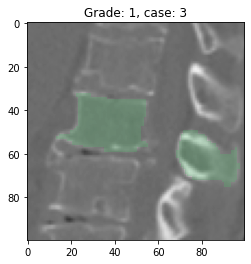

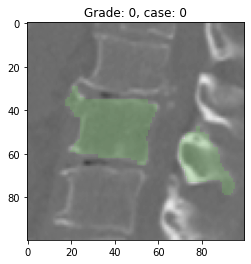

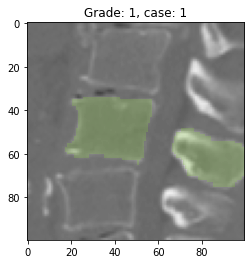

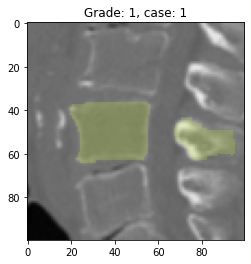

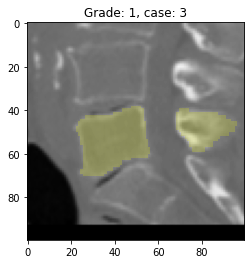

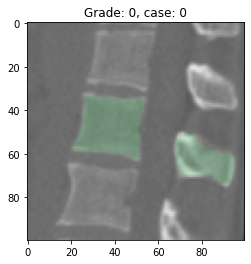

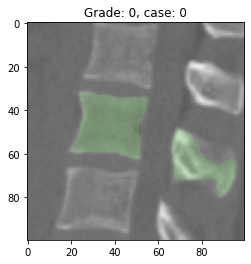

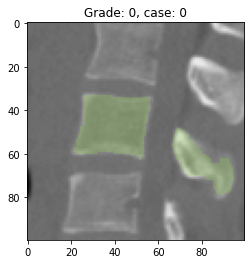

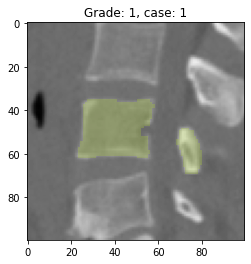

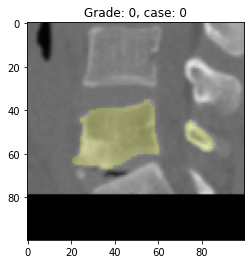

In [3]:
for i in range(10):
    x, g, c = dataset.__getitem__(i)    
    img, msk = x[0].numpy(), x[1].numpy()
    mid_slice = img.shape[0] // 2
    plt.figure()
    plt_msk = np.ma.masked_where(msk == np.min(msk), msk)    
    plt.imshow(img[mid_slice, :, :], cmap='gray', vmin=0, vmax=1)
    plt.imshow(plt_msk[mid_slice, :, :], alpha=0.25, vmin=0, vmax=1)
    plt.title('Grade: {}, case: {}'.format(g, c))